<a href="https://colab.research.google.com/github/mmnasciment/TelecomX_ML/blob/main/TelecomX_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tratamento dos dados


In [66]:
import pandas as pd
dados = pd.read_csv('https://raw.githubusercontent.com/mmnasciment/TelecomX_CustomersChurn/refs/heads/main/dados_tratados.csv')

## Remoção de Colunas Irrelevantes

Removendo customer_id

In [67]:
dados.head()
dados.drop('customer_id', axis=1, inplace=True)

Removendo daily_charges

In [68]:
dados.drop('daily_charges', axis=1, inplace=True)

## Conveter dados binarios para utilizar o getdummies ou OneHotEncoder

In [69]:
dados.head()

,churn,gender,is_senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
0,No,Female,No,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,No,Male,No,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,Yes,Male,No,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


Encoding

In [70]:
dados_encoded = pd.get_dummies(dados)
dados_encoded.head()


,tenure,monthly_charges,total_charges,churn_No,churn_Yes,gender_Female,gender_Male,is_senior_citizen_No,is_senior_citizen_Yes,partner_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,9,65.6,593.30,True,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,True
1,9,59.9,542.40,True,False,False,True,True,False,True,...,True,True,False,False,True,False,False,False,False,True
2,4,73.9,280.85,False,True,False,True,True,False,True,...,False,True,False,False,False,True,False,False,True,False
3,13,98.0,1237.85,False,True,False,True,False,True,False,...,True,True,False,False,False,True,False,False,True,False
4,3,83.9,267.40,False,True,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,True


In [71]:
for column in dados_encoded.columns:
    if dados_encoded[column].dtype == bool:
      dados_encoded[column] = dados_encoded[column].map({True: 1, False: 0})
dados_encoded.head()

,tenure,monthly_charges,total_charges,churn_No,churn_Yes,gender_Female,gender_Male,is_senior_citizen_No,is_senior_citizen_Yes,partner_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,9,65.6,593.30,1,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,9,59.9,542.40,1,0,0,1,1,0,1,...,1,1,0,0,1,0,0,0,0,1
2,4,73.9,280.85,0,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,13,98.0,1237.85,0,1,0,1,0,1,0,...,1,1,0,0,0,1,0,0,1,0
4,3,83.9,267.40,0,1,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,1


salvando o novo df

In [72]:
pd.DataFrame(dados_encoded).to_csv('dados_tratados_encoded.csv', index=False)

## Verificando proporção de evasão

In [73]:
analise_churn = dados['churn'].value_counts()

In [74]:
analise_churn

,count
churn,
No,5163
Yes,1869


In [75]:
analise_churn_porcentagem = round(dados['churn'].value_counts(normalize = True)*100,2)

In [76]:
analise_churn_porcentagem

,proportion
churn,
No,73.42
Yes,26.58


## Balanceando as classes com SMOTE

In [77]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [78]:
X = dados_encoded.drop(['churn_No', 'churn_Yes'], axis=1)
y = dados_encoded['churn_Yes']

In [79]:

print(y.value_counts())

churn_Yes
0    5163
1    1869
Name: count, dtype: int64


In [80]:
X.head()

,tenure,monthly_charges,total_charges,gender_Female,gender_Male,is_senior_citizen_No,is_senior_citizen_Yes,partner_No,partner_Yes,dependents_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,9,65.6,593.30,1,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,0,1
1,9,59.9,542.40,0,1,1,0,1,0,1,...,1,1,0,0,1,0,0,0,0,1
2,4,73.9,280.85,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
3,13,98.0,1237.85,0,1,0,1,0,1,1,...,1,1,0,0,0,1,0,0,1,0
4,3,83.9,267.40,1,0,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [81]:
X_resampled, y_resampled = smt.fit_resample(X, y)

In [82]:
print(y_resampled.value_counts())


churn_Yes
0    5163
1    5163
Name: count, dtype: int64


In [83]:
X_resampled.value_counts()

tenure  monthly_charges  total_charges  gender_Female  gender_Male  is_senior_citizen_No  is_senior_citizen_Yes  partner_No  partner_Yes  dependents_No  dependents_Yes  phone_service_No  phone_service_Yes  multiple_lines_No  multiple_lines_No phone service  multiple_lines_Yes  internet_service_DSL  internet_service_Fiber optic  internet_service_No  online_security_No  online_security_No internet service  online_security_Yes  online_backup_No  online_backup_No internet service  online_backup_Yes  device_protection_No  device_protection_No internet service  device_protection_Yes  tech_support_No  tech_support_No internet service  tech_support_Yes  streaming_tv_No  streaming_tv_No internet service  streaming_tv_Yes  streaming_movies_No  streaming_movies_No internet service  streaming_movies_Yes  contract_Month-to-month  contract_One year  contract_Two year  paperless_billing_No  paperless_billing_Yes  payment_method_Bank transfer (automatic)  payment_method_Credit card (automatic)  payment_method_Electronic check  payment_method_Mailed check
1       20.900000        20.900000      1              0            1                     0                      1           0            1              0               0                 1                  1                  0                                0                   0                     0                             1                    0                   1                                    0                    0                 1                                  0                  0                     1                                      0                      0                1                                 0                 0                1                                 0                 0                    1                                     0                     1                        0                  0                  1                     0                      0                                         0                                       0                                1                              4
        45.700000        45.700000      0              1            1                     0                      1           0            1              0               0                 1                  1                  0                                0                   1                     0                             0                    1                   0                                    0                    1                 0                                  0                  1                     0                                      0                      1                0                                 0                 1                0                                 0                 1                    0                                     0                     1                        0                  0                  0                     1                      0                                         0                                       0                                1                              4
        69.900000        69.900000      0              1            1                     0                      1           0            1              0               0                 1                  1                  0                                0                   0                     1                             0                    1                   0                                    0                    1                 0                                  0                  1                     0                                      0                      1                0                                 0                 1                0                                 0                 1                    0                                     0                     1                    

# Correlação e Seleção de Variáveis

## Análise de Correlação


In [84]:
corr = dados_encoded.corr()
corr

,tenure,monthly_charges,total_charges,churn_No,churn_Yes,gender_Female,gender_Male,is_senior_citizen_No,is_senior_citizen_Yes,partner_No,...,streaming_movies_Yes,contract_Month-to-month,contract_One year,contract_Two year,paperless_billing_No,paperless_billing_Yes,payment_method_Bank transfer (automatic),payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
tenure,1.000000,0.246862,0.825880,0.354049,-0.354049,-0.005285,0.005285,-0.015683,0.015683,-0.381912,...,0.285402,-0.649346,0.202338,0.563801,-0.004823,0.004823,0.243822,0.232800,-0.210197,-0.232181
monthly_charges,0.246862,1.000000,0.651065,-0.192858,0.192858,0.013779,-0.013779,-0.219874,0.219874,-0.097825,...,0.627235,0.058933,0.004810,-0.073256,-0.351930,0.351930,0.042410,0.030055,0.271117,-0.376568
total_charges,0.825880,0.651065,1.000000,0.199484,-0.199484,-0.000048,0.000048,-0.102411,0.102411,-0.319072,...,0.519867,-0.446776,0.170569,0.358036,-0.157830,0.157830,0.186119,0.182663,-0.060436,-0.294708
churn_No,0.354049,-0.192858,0.199484,1.000000,-1.000000,-0.008545,0.008545,0.150541,-0.150541,-0.149982,...,-0.060860,-0.404565,0.178225,0.301552,0.191454,-0.191454,0.118136,0.134687,-0.301455,0.090773
churn_Yes,-0.354049,0.192858,-0.199484,-1.000000,1.000000,0.008545,-0.008545,-0.150541,0.150541,0.149982,...,0.060860,0.404565,-0.178225,-0.301552,-0.191454,0.191454,-0.118136,-0.134687,0.301455,-0.090773
gender_Female,-0.005285,0.013779,-0.000048,-0.008545,0.008545,1.000000,-1.000000,-0.001819,0.001819,-0.001379,...,0.010105,0.003251,-0.007755,0.003603,-0.011902,0.011902,0.015973,-0.001632,-0.000844,-0.013199
gender_Male,0.005285,-0.013779,0.000048,0.008545,-0.008545,-1.000000,1.000000,0.001819,-0.001819,0.001379,...,-0.010105,-0.003251,0.007755,-0.003603,0.011902,-0.011902,-0.015973,0.001632,0.000844,0.013199
is_senior_citizen_No,-0.015683,-0.219874,-0.102411,0.150541,-0.150541,-0.001819,0.001819,1.000000,-1.000000,0.016957,...,-0.119842,-0.137752,0.046491,0.116205,0.156258,-0.156258,0.016235,0.024359,-0.171322,0.152987
is_senior_citizen_Yes,0.015683,0.219874,0.102411,-0.150541,0.150541,0.001819,-0.001819,-1.000000,1.000000,-0.016957,...,0.119842,0.137752,-0.046491,-0.116205,-0.156258,0.156258,-0.016235,-0.024359,0.171322,-0.152987
partner_No,-0.381912,-0.097825,-0.319072,-0.149982,0.149982,-0.001379,0.001379,0.016957,-0.016957,1.000000,...,-0.118108,0.280202,-0.083067,-0.247334,-0.013957,0.013957,-0.111406,-0.082327,0.083207,0.096948


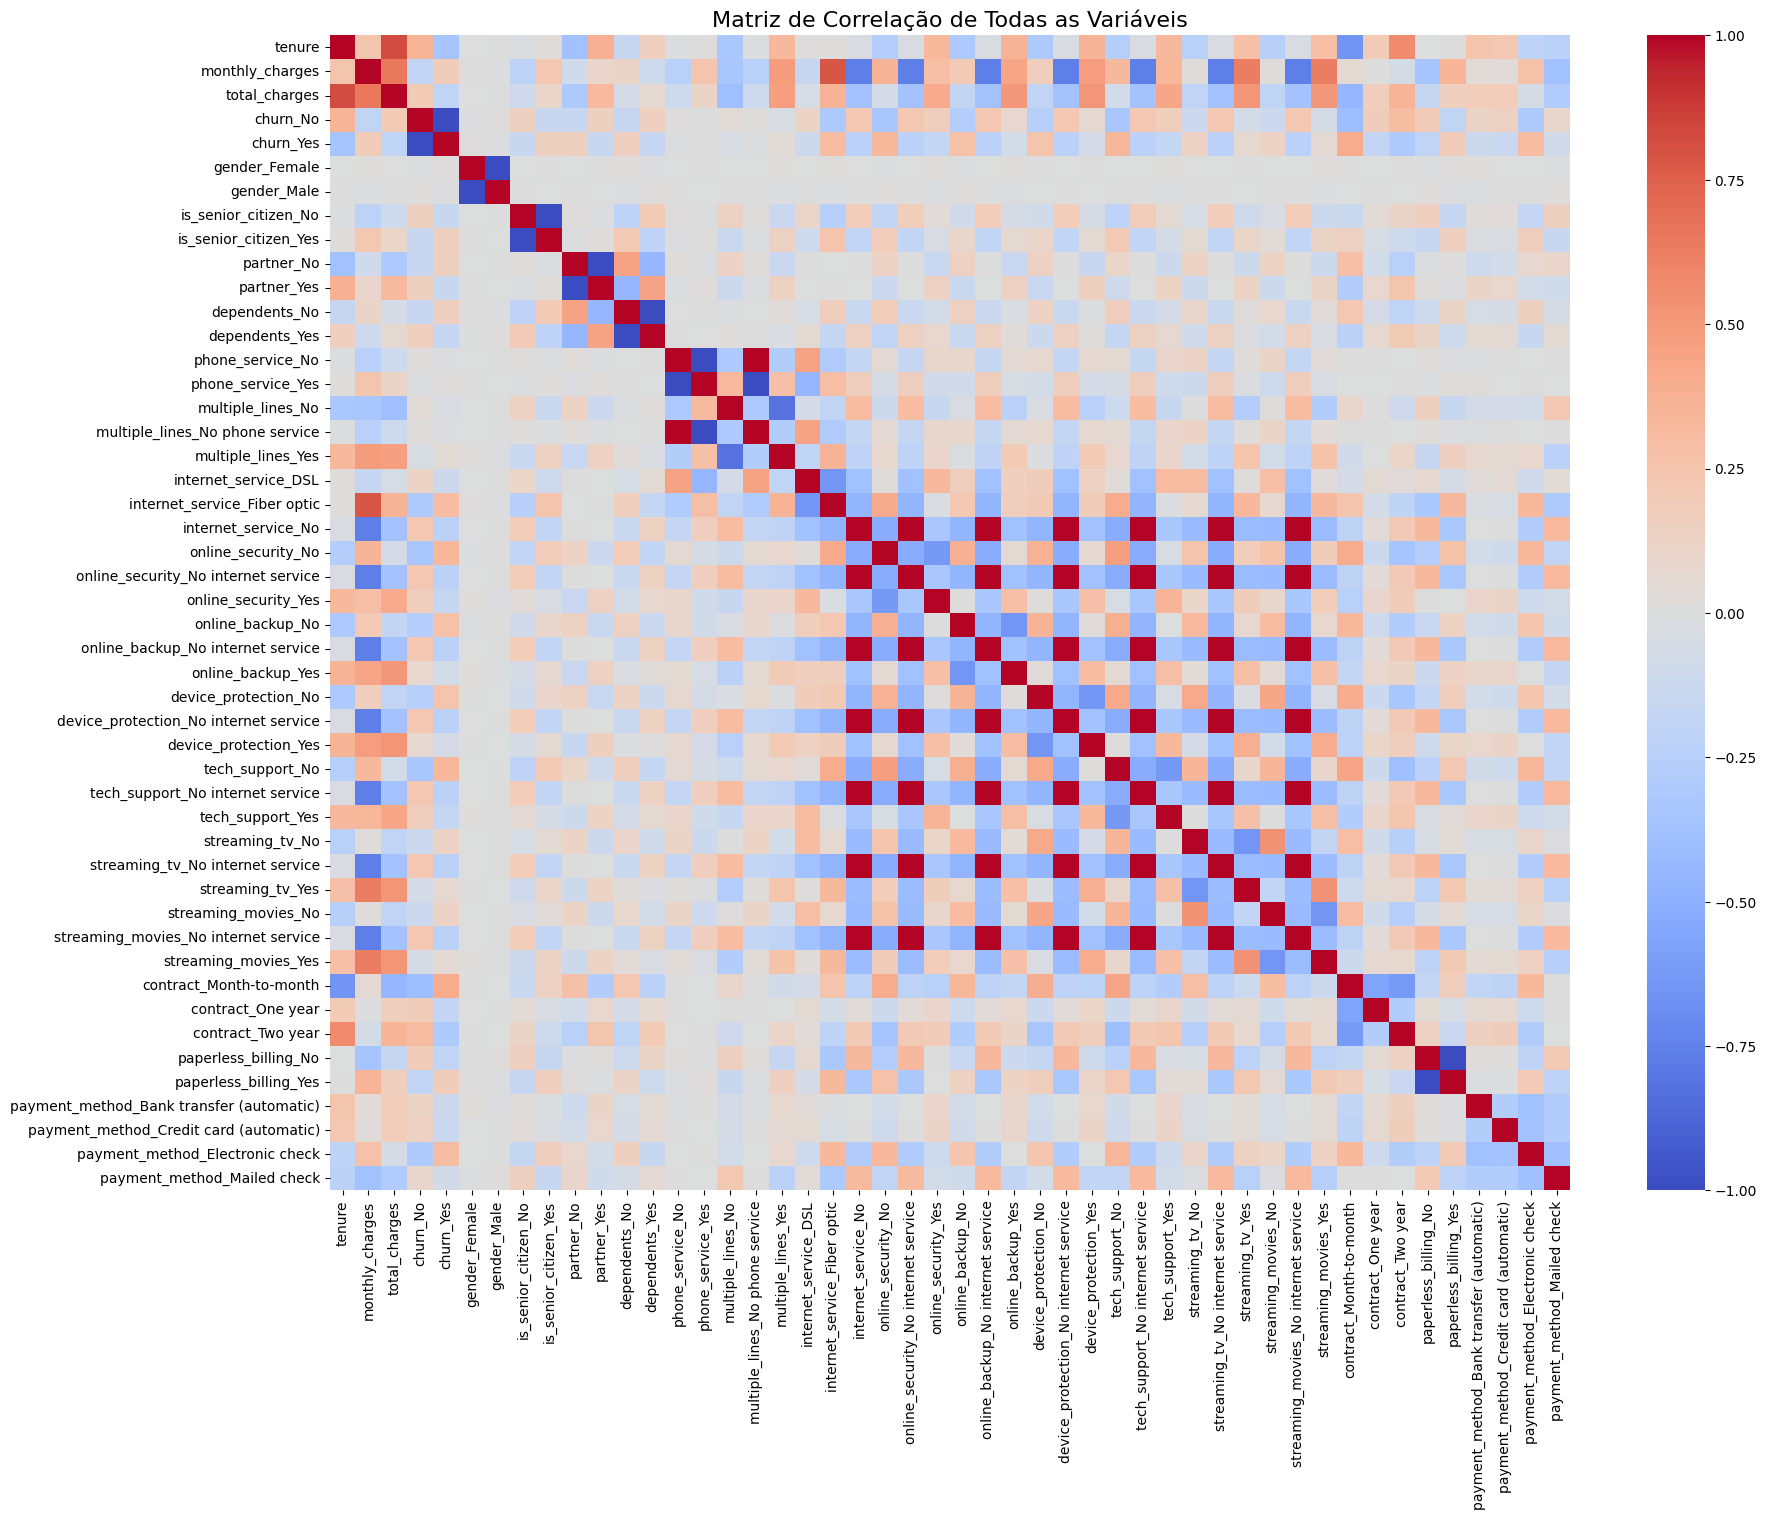

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 15))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação de Todas as Variáveis', fontsize=16)
plt.savefig('correlation_matrix.png', bbox_inches='tight')

Correlação com o Churn

In [86]:
corr_churn = corr['churn_Yes'].sort_values(ascending=False)

In [87]:
corr_churn = corr_churn.drop(['churn_Yes', 'churn_No'])

/tmp/ipython-input-3299085188.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='vlag')


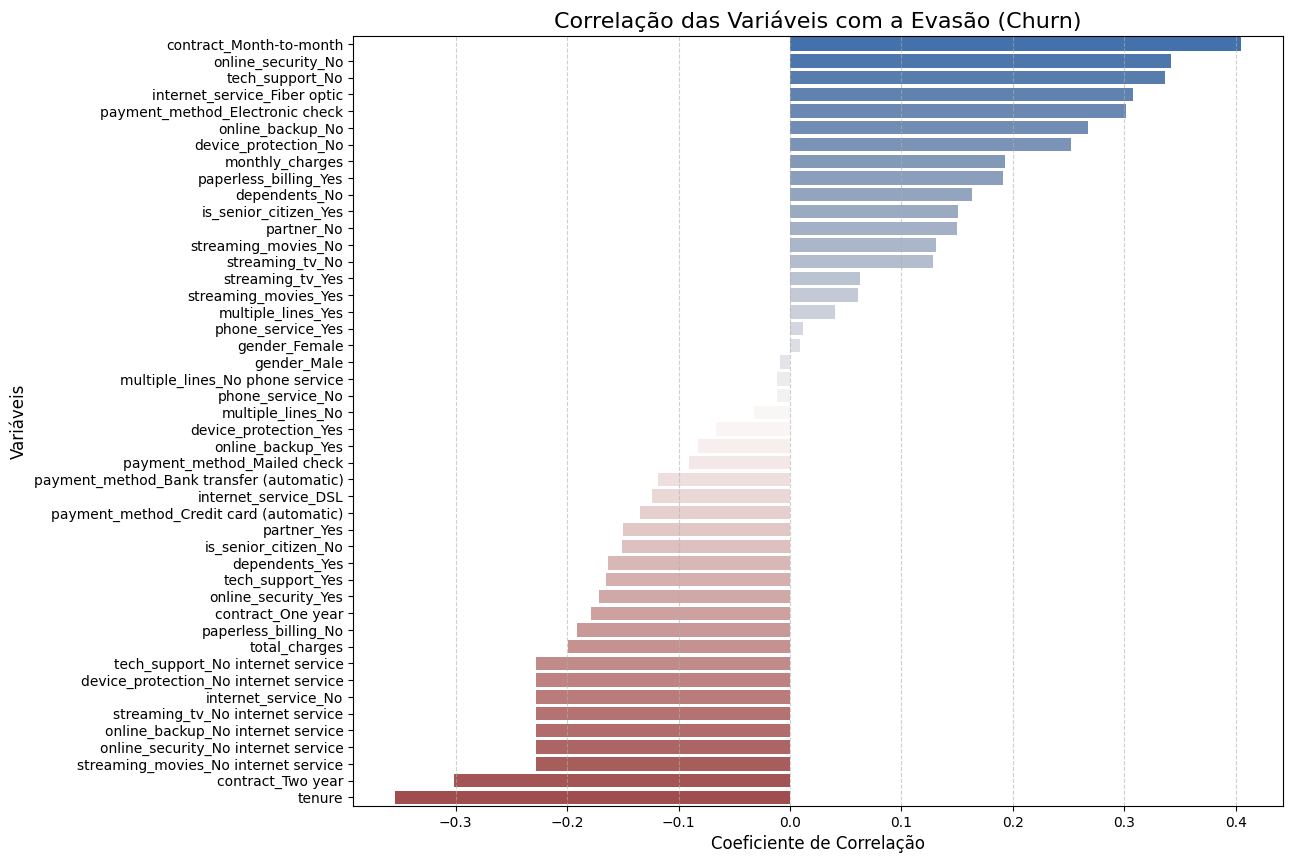

In [88]:
plt.figure(figsize=(12, 10))
sns.barplot(x=corr_churn.values, y=corr_churn.index, palette='vlag')
plt.title('Correlação das Variáveis com a Evasão (Churn)', fontsize=16)
plt.xlabel('Coeficiente de Correlação', fontsize=12)
plt.ylabel('Variáveis', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.savefig('churn_correlation.png', bbox_inches='tight')

## Tempo de contrato x Evasão

/tmp/ipython-input-1615054159.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='churn', x='tenure', data=dados, palette='pastel' )


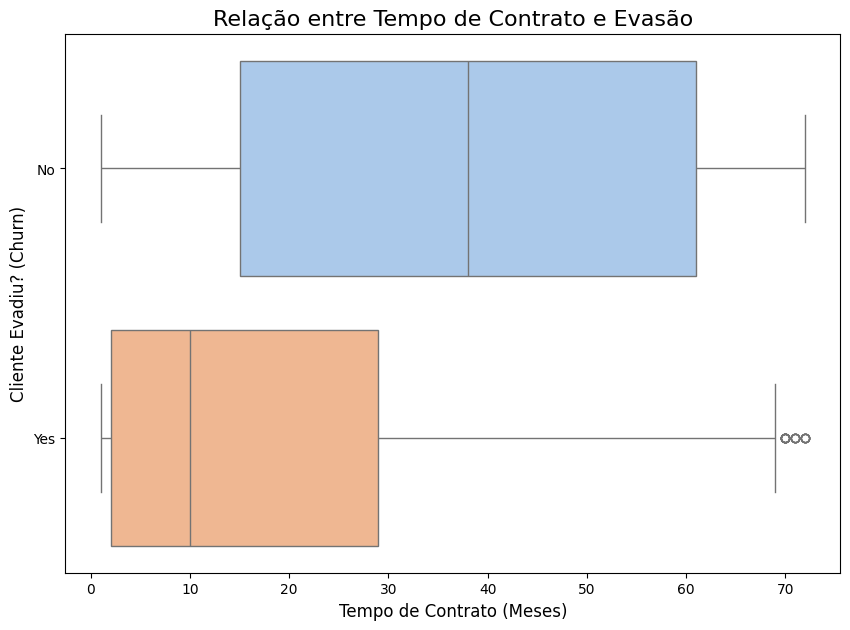

In [89]:
plt.figure(figsize=(10, 7))
sns.boxplot(y='churn', x='tenure', data=dados, palette='pastel' )
plt.title('Relação entre Tempo de Contrato e Evasão', fontsize=16)
plt.ylabel('Cliente Evadiu? (Churn)', fontsize=12)
plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
plt.show() # Em um notebook, .show() exibe o gráfico

o Boxplot revela a alta concentração dos clientes que realizaram evasão em um intervalo de 0 a 10 meses de contrato. A satisfação na primeira relação com a empresa demonstra ser um fator essencial para o cliente não evadir.

## Gastos Mensal x *Evasão*

/tmp/ipython-input-1539892216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='churn', x='monthly_charges', data=dados, palette='pastel')


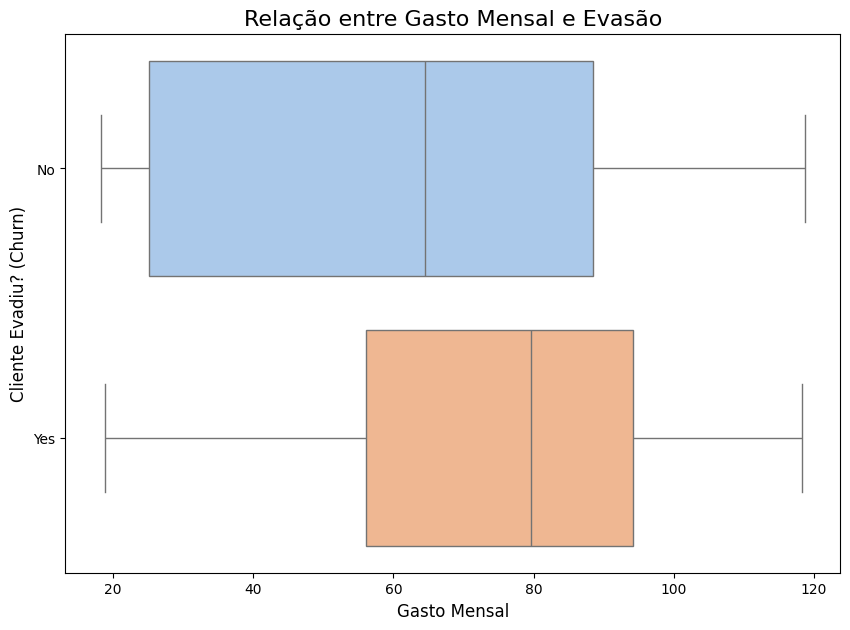

In [90]:
plt.figure(figsize=(10, 7))
sns.boxplot(y='churn', x='monthly_charges', data=dados, palette='pastel')
plt.title('Relação entre Gasto Mensal e Evasão', fontsize=16)
plt.ylabel('Cliente Evadiu? (Churn)', fontsize=12)
plt.xlabel('Gasto Mensal', fontsize=12)
plt.show()

/tmp/ipython-input-3320779165.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='churn', x='total_charges', data=dados, palette='pastel')


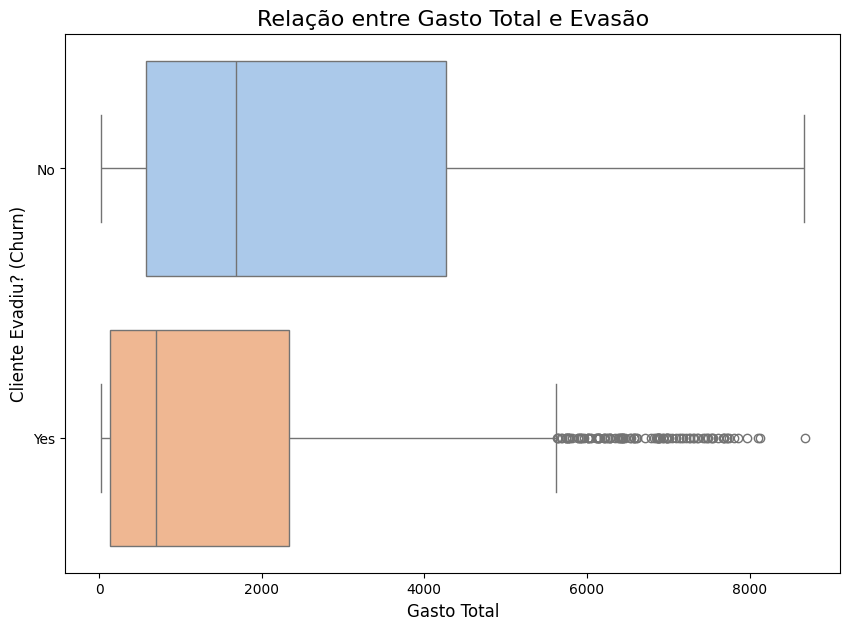

In [91]:


plt.figure(figsize=(10, 7))
sns.boxplot(y='churn', x='total_charges', data=dados, palette='pastel')
plt.title('Relação entre Gasto Total e Evasão', fontsize=16)
plt.ylabel('Cliente Evadiu? (Churn)', fontsize=12)
plt.xlabel('Gasto Total', fontsize=12)
plt.show()

A analise do gasto mensal para clientes que evadiram revela uma maior mediana de gasto mensal desses clientes, comparado aos que não evadiram. Talvez os serviços oferecidos pela empresa estejam mais elevados que na concorrência.

# Modelagem Preditiva

## Separação de dados

Os dados já foram balanceados utilizando o SMOTE na preparação de dados (X_resampled, y_resampled)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2)

In [94]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8260, 46), (2066, 46), (8260,), (2066,))

## Padronização para RL ou KNN

In [95]:
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()

In [97]:
numeric_cols = ['tenure', 'monthly_charges', 'total_charges']

In [98]:
RL_train = x_train.copy()
RL_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])

In [99]:
RL_test = x_test.copy()
RL_test[numeric_cols] = scaler.transform(x_test[numeric_cols])

In [100]:
print(RL_train.head())

        tenure  monthly_charges  total_charges  gender_Female  gender_Male  \
2404  0.808020         0.621007       0.829966              0            1   
2483  1.520030        -0.642631       0.529396              1            0   
8177 -0.867295         0.742429      -0.632839              0            1   
7587  0.012245         1.016701       0.317204              0            0   
2485 -0.657881        -0.780514      -0.711143              1            0   

      is_senior_citizen_No  is_senior_citizen_Yes  partner_No  partner_Yes  \
2404                     0                      1           1            0   
2483                     1                      0           0            1   
8177                     0                      0           0            0   
7587                     0                      1           0            1   
2485                     1                      0           0            1   

      dependents_No  ...  streaming_movies_Yes  contract_Month

In [101]:
print(RL_test.head())

        tenure  monthly_charges  total_charges  gender_Female  gender_Male  \
7337 -1.076710         0.284883      -0.868651              0            1   
9178  1.729444         1.426309       2.504773              0            1   
5957 -0.113403        -0.490785      -0.290413              1            0   
6183  1.813210         0.032822       1.342301              1            0   
368  -0.155286         0.404583      -0.091057              0            1   

      is_senior_citizen_No  is_senior_citizen_Yes  partner_No  partner_Yes  \
7337                     0                      0           1            0   
9178                     0                      0           0            0   
5957                     1                      0           1            0   
6183                     0                      1           0            1   
368                      0                      1           0            1   

      dependents_No  ...  streaming_movies_Yes  contract_Month

# Criação dos Modelos

## Regressão Logística

Este modelo é sensível à escala das variáveis. Como vimos, variáveis com magnitudes muito diferentes (como tenure e total_charges) precisam ser colocadas em uma escala comum para que o modelo funcione corretamente. Portanto, usaremos os dados padronizados (X_train_scaled).

In [102]:
from sklearn.linear_model import LogisticRegression

In [117]:
logreg = LogisticRegression(random_state=1, max_iter=1000)
logreg.fit(RL_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [119]:
logreg.score(RL_train, y_train)

0.8578692493946731

## Random Forest

É um dos algoritmos mais populares e eficazes para problemas de classificação. Por ser um conjunto de várias árvores de decisão, ele é menos propenso a overfitting do que uma única árvore e captura padrões complexos.

In [105]:
from sklearn.ensemble import RandomForestClassifier

In [106]:
rf = RandomForestClassifier(max_depth=8, random_state=1, n_jobs=-1)

In [107]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, n_jobs=-1, random_state=1)

In [108]:
rf.score(x_train, y_train)

0.8702179176755448

## Avaliação dos Modelos

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [115]:
y_previsoes_reglog = logreg.predict(RL_test)
y_previsoes_rf = rf.predict(x_test)

Regressão Logística / Classificarion report

In [121]:
print(classification_report(y_test, y_previsoes_reglog, target_names=['Não Churn (0)', 'Churn (1)']))

               precision    recall  f1-score   support

Não Churn (0)       0.87      0.87      0.87      1052
    Churn (1)       0.87      0.87      0.87      1014

     accuracy                           0.87      2066
    macro avg       0.87      0.87      0.87      2066
 weighted avg       0.87      0.87      0.87      2066



Regressão Logistica / Matriz de confusão

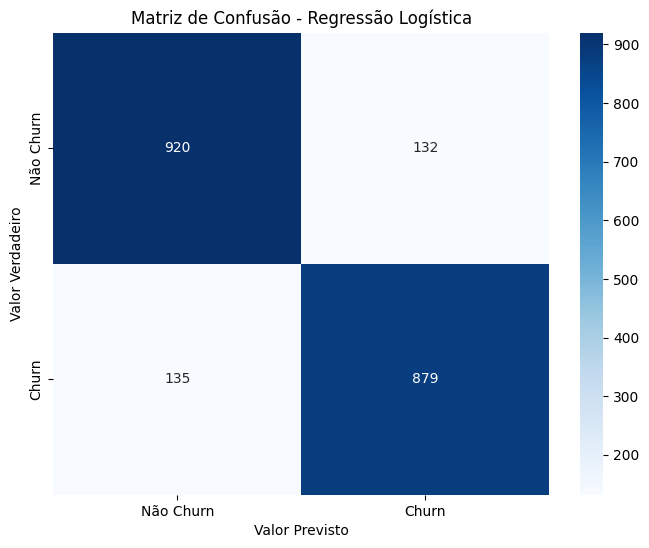

In [122]:
matrix_reglog = confusion_matrix(y_test, y_previsoes_reglog)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_reglog, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Regressão Logística')
plt.ylabel('Valor Verdadeiro')
plt.xlabel('Valor Previsto')
plt.savefig('cm_log_reg.png')

RF / Classification Report

In [123]:
print(classification_report(y_test, y_previsoes_rf, target_names=['Não Churn (0)', 'Churn (1)']))

               precision    recall  f1-score   support

Não Churn (0)       0.90      0.81      0.85      1052
    Churn (1)       0.82      0.90      0.86      1014

     accuracy                           0.86      2066
    macro avg       0.86      0.86      0.86      2066
 weighted avg       0.86      0.86      0.86      2066



RF / Matriz e Confusão

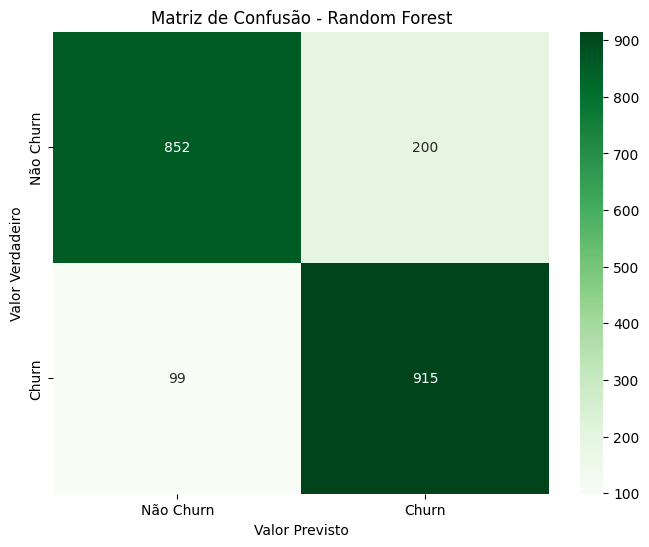

In [124]:
matrix_rf = confusion_matrix(y_test, y_previsoes_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Churn', 'Churn'], yticklabels=['Não Churn', 'Churn'])
plt.title('Matriz de Confusão - Random Forest')
plt.ylabel('Valor Verdadeiro')
plt.xlabel('Valor Previsto')
plt.savefig('cm_rf.png')

In [125]:
y_previsao_logreg = logreg.predict(RL_train)
y_previsao_rf = rf.predict(x_train)

print(f"Regressão Logística - Acurácia de Treino: {accuracy_score(y_train, y_previsao_logreg):.4f}")
print(f"Regressão Logística - Acurácia de Teste:  {accuracy_score(y_test, y_previsoes_reglog):.4f}")


print(f"Random Forest - Acurácia de Treino: {accuracy_score(y_train, y_previsao_rf):.4f}")
print(f"Random Forest - Acurácia de Teste:  {accuracy_score(y_test, y_previsoes_rf):.4f}")

Regressão Logística - Acurácia de Treino: 0.8579
Regressão Logística - Acurácia de Teste:  0.8708
Random Forest - Acurácia de Treino: 0.8702
Random Forest - Acurácia de Teste:  0.8553


In [126]:
precision_lr = precision_score(y_test, y_previsoes_reglog, pos_label=1)
recall_lr = recall_score(y_test, y_previsoes_reglog, pos_label=1)
f1_lr = f1_score(y_test, y_previsoes_reglog, pos_label=1)

In [127]:
precision_rf = precision_score(y_test, y_previsoes_rf, pos_label=1)
recall_rf = recall_score(y_test, y_previsoes_rf, pos_label=1)
f1_rf = f1_score(y_test, y_previsoes_rf, pos_label=1)

In [128]:
print(f"Regressão Logística - Precisão para Churn: {precision_lr:.4f}")
print(f"Regressão Logística - Recall para Churn:   {recall_lr:.4f}")
print(f"Regressão Logística - F1-Score para Churn: {f1_lr:.4f}")

Regressão Logística - Precisão para Churn: 0.8694
Regressão Logística - Recall para Churn:   0.8669
Regressão Logística - F1-Score para Churn: 0.8681


In [129]:
print(f"Random Forest - Precisão para Churn: {precision_rf:.4f}")
print(f"Random Forest - Recall para Churn:   {recall_rf:.4f}")
print(f"Random Forest - F1-Score para Churn: {f1_rf:.4f}")

Random Forest - Precisão para Churn: 0.8206
Random Forest - Recall para Churn:   0.9024
Random Forest - F1-Score para Churn: 0.8596


Embora a Regressão Logística seja um modelo mais estável (sem overfitting) e com maior precisão, o Random Forest tem o melhor desempenho para o objetivo de negócio principal, que é reduzir a evasão de clientes.

A razão para isso é o seu Recall superior. Em um cenário de churn, o custo de não identificar um cliente que vai sair (falso negativo) é muito maior do que o custo de contatar um cliente que não ia sair (falso positivo). O Random Forest consegue "capturar" uma fatia maior dos clientes em risco (88.6%), dando à empresa mais oportunidades de agir e retê-los.

# Analise das variáveis

## RL

In [130]:
coeficientes_rl = pd.DataFrame({
    'Variável': x_train.columns,
    'Coeficiente': logreg.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

# Separar os coeficientes positivos (aumentam churn) e negativos (diminuem churn)
coeficientes_positivos_rl = coeficientes_rl.head(10)
coeficientes_positivos_rl




,Variável,Coeficiente
2,total_charges,1.094574
1,monthly_charges,0.227269
17,internet_service_Fiber optic,0.199809
12,phone_service_Yes,0.037156
37,contract_Month-to-month,-0.136026
11,phone_service_No,-0.327359
14,multiple_lines_No phone service,-0.327359
16,internet_service_DSL,-0.330522
19,online_security_No,-0.627586
36,streaming_movies_Yes,-0.703124


In [131]:
coeficientes_negativos_rl = coeficientes_rl.tail(10)
coeficientes_negativos_rl

,Variável,Coeficiente
7,partner_No,-1.900005
10,dependents_Yes,-2.000592
6,is_senior_citizen_Yes,-2.121584
45,payment_method_Mailed check,-2.151990
40,paperless_billing_No,-2.152181
42,payment_method_Bank transfer (automatic),-2.195994
4,gender_Male,-2.222943
43,payment_method_Credit card (automatic),-2.276105
3,gender_Female,-2.281984
5,is_senior_citizen_No,-2.316325


In [132]:
coeficientes_rl = pd.concat([coeficientes_positivos_rl, coeficientes_negativos_rl])

In [133]:
coeficientes_rl

,Variável,Coeficiente
2,total_charges,1.094574
1,monthly_charges,0.227269
17,internet_service_Fiber optic,0.199809
12,phone_service_Yes,0.037156
37,contract_Month-to-month,-0.136026
11,phone_service_No,-0.327359
14,multiple_lines_No phone service,-0.327359
16,internet_service_DSL,-0.330522
19,online_security_No,-0.627586
36,streaming_movies_Yes,-0.703124


/tmp/ipython-input-1007961013.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coeficiente', y='Variável', data=coeficientes_rl, palette='vlag')


Gráfico 'logistic_regression_coefficients.png' gerado.


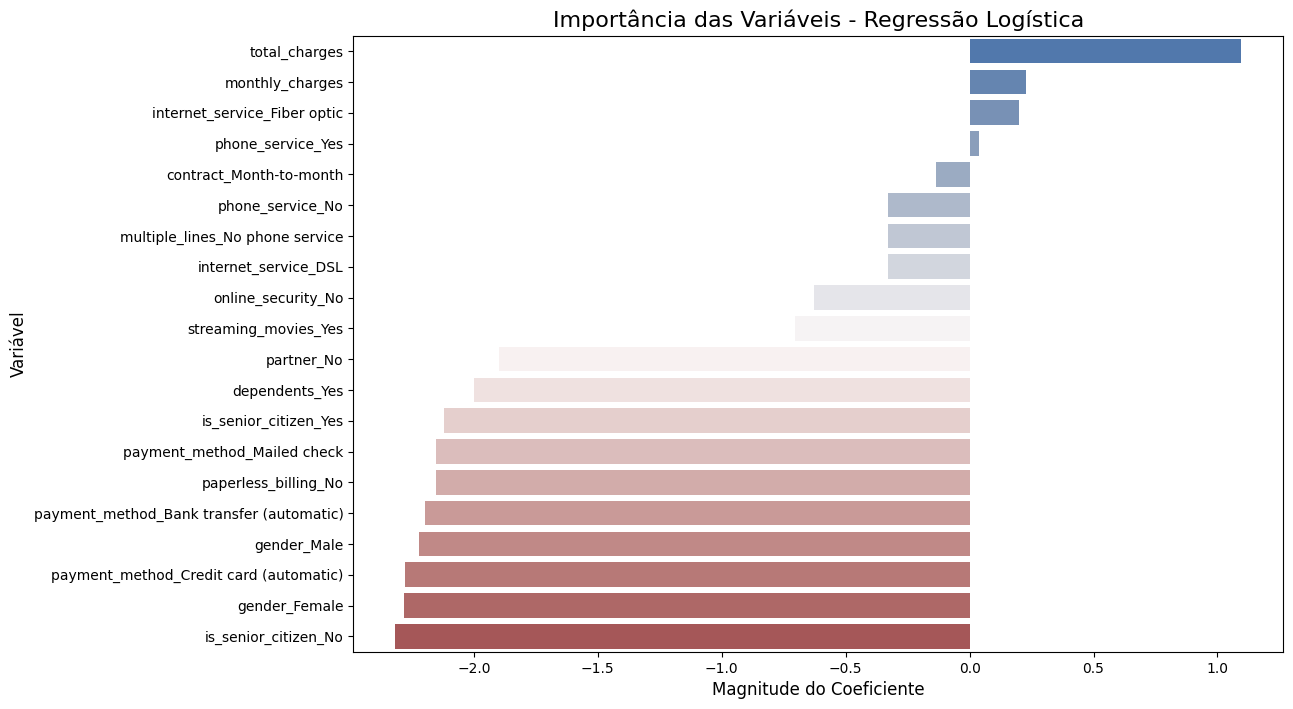

In [134]:
# Plotar os coeficientes
plt.figure(figsize=(12, 8))
sns.barplot(x='Coeficiente', y='Variável', data=coeficientes_rl, palette='vlag')
plt.title('Importância das Variáveis - Regressão Logística', fontsize=16)
plt.xlabel('Magnitude do Coeficiente', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.savefig('logistic_regression_coefficients.png', bbox_inches='tight')
print("Gráfico 'logistic_regression_coefficients.png' gerado.")

## RF

In [135]:
importancia_rf = pd.DataFrame({
    'Variável': x_train.columns,
    'Importância': rf.feature_importances_
}).sort_values(by='Importância', ascending=False)

/tmp/ipython-input-2817454850.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importância', y='Variável', data=importancia_rf.head(15), palette='viridis')


Gráfico 'random_forest_importance.png' gerado.

10 Variáveis mais importantes segundo o Random Forest:
                        Variável  Importância
0                         tenure     0.105868
37       contract_Month-to-month     0.086808
39             contract_Two year     0.074167
21           online_security_Yes     0.072593
2                  total_charges     0.053032
40          paperless_billing_No     0.048179
38             contract_One year     0.045839
30              tech_support_Yes     0.044957
17  internet_service_Fiber optic     0.041170
1                monthly_charges     0.035368


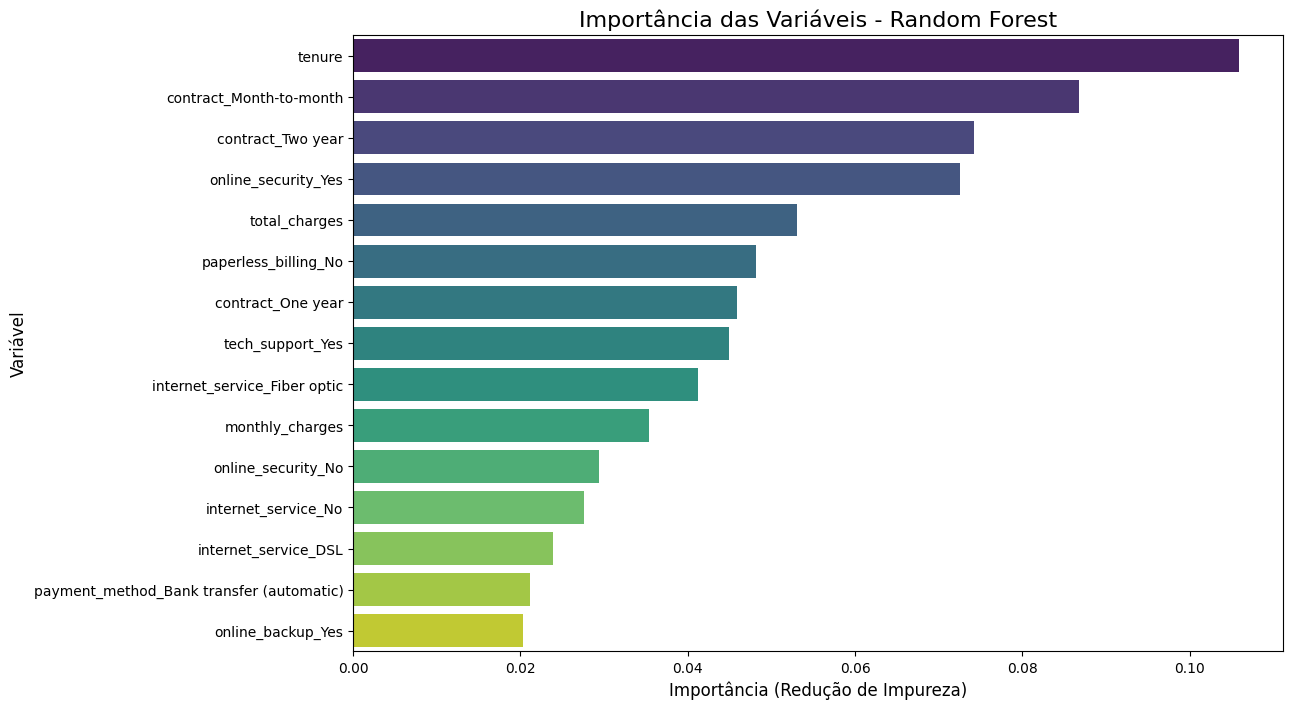

In [136]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importância', y='Variável', data=importancia_rf.head(15), palette='viridis')
plt.title('Importância das Variáveis - Random Forest', fontsize=16)
plt.xlabel('Importância (Redução de Impureza)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.savefig('random_forest_importance.png', bbox_inches='tight')
print("Gráfico 'random_forest_importance.png' gerado.")
print("\n10 Variáveis mais importantes segundo o Random Forest:")
print(importancia_rf.head(10))

# Relatório

## Principais fatores que afetam a evasão



1.   **Tipo e Duração do Contrato:**
Este é, sem dúvida, o fator mais determinante. O modelo Random Forest classificou o tenure (tempo de contrato) como a variável de maior importância, e os tipos de contrato (Month-to-month, Two year) como o segundo e terceiro mais relevantes. A Regressão Logística corrobora a observação, mostrando que o contrato Month-to-month é o principal indicador que aumenta a chance de churn, enquanto contratos de longo prazo são os que mais diminuem esse risco.
2.   **Serviços de Proteção e Suporte:**
A ausência de serviços de segurança online e suporte técnico está fortemente correlacionada com o churn. O Random Forest classificou online_security_Yes e tech_support_Yes entre as 10 variáveis mais importantes. A Regressão Logística mostrou que a ausência desses serviços (online_security_No) tem um forte coeficiente negativo, indicando que não tê-los aumenta a probabilidade de cancelamento.
3.  **Valor e Tipo de Serviço:** As cobranças totais (total_charges), que estão diretamente ligadas ao tempo de contrato, são um forte indicador de lealdade. No entanto, o serviço de Fibra Ótica aparece consistentemente como um fator de risco. Ambos os modelos destacam sua importância. Isso pode sugerir que, embora seja um serviço premium, ele pode estar gerando insatisfação por questões de preço, instabilidade ou expectativas não atendidas.

## Estratégias para Retenção



1.   Migração de Contratos Mensais para Anuais:
Criar campanhas proativas para clientes com contrato Month-to-month, oferecendo descontos significativos no monthly_charges para a migração para planos de 1 ou 2 anos. O benefício em retenção a longo prazo (indicado pelo forte peso da variável tenure) compensa a redução da receita mensal.
2.   Programa de retenção para Novos Clientes (Primeiros Meses): Implementar um programa de "onboarding" robusto para clientes nos primeiros 6 meses (período de maior risco). Oferecer gratuitamente por um período de teste serviços como Suporte Técnico Premium (tech_support) e Segurança Online (online_security). A análise mostra que clientes que utilizam esses serviços tendem a ficar mais tempo.
3. Investigação e Melhoria do Serviço de Fibra Ótica: Realizar uma análise de causa raiz para entender por que o serviço de Fibra Ótica está correlacionado com o churn. Isso pode envolver pesquisas de satisfação com esses clientes específicos, análise da infraestrutura técnica para identificar instabilidades ou uma revisão da estratégia de preços em comparação com a concorrência.
